### Linkedin Application Analysis

### Aim of Analysis is to be able to predict the next prefered work type an applicant will go for

### Business Understanding

LinkedIn is a professional networking platform designed to help individuals and businesses connect, share, and grow their professional networks.  
Key Features:  
Profiles:  

Individuals: Users can create detailed profiles showcasing their work experience, education, skills, and endorsements. This serves as an online resume.
Companies: Businesses can create company pages to promote their brand, post job openings, and share updates.  
Connections:  

Users can connect with colleagues, industry peers, and potential employers. Connections help in building a professional network.  
Content Sharing:  

Users and companies can post updates, articles, and other content. This helps in engaging with their network and sharing expertise.  
Job Listings:  

Companies post job openings, and users can apply directly through LinkedIn. The platform also provides job recommendations based on user profiles.

## Data Importation

In [66]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

## Querrying The Data

In [2]:
#Importing xlsx file
data = pd.read_excel("linkdin_job_data.xlsx")
data

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,3472039871,Back End Developer,"Kochi, Kerala, India",NaN,Orion Innovation,Hybrid,Full-time · Associate,"5,001-10,000 employees · IT Services and IT Co...",25,2 days,24 company alumni,Poornima Viswanathan,NaN,https://www.linkedin.com/in/poornima-viswanath...,About the job The ideal candidate will show in...
7923,3473194471,Software Engineer - Senior,"Gurugram, Haryana, India",NaN,Uplers,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",18,2 days,3 company alumni,Tejveer Singh,NaN,https://www.linkedin.com/in/tejveer-singh-a348...,About the job Experience: 4 - 8 yearsProfile: ...
7924,3461005032,Vue JS,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",15,6 days,"10,080 company alumni",ANNIE ANTONY,"11,923,634 followers",https://www.linkedin.com/in/annie-antony-a1041...,About the job Role- Vue js DeveloperExperience...
7925,3474305684,iOS Developer,"Bengaluru, Karnataka, India",NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",17,1 day,3 company alumni,Arjun Jaggi,NaN,https://www.linkedin.com/in/arjunjaggi7,About the job Profile: iOS DeveloperExperience...


In [3]:
#Quick inspection of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 929.1

In [4]:
#Summary of the data
data.describe()

,job_ID,company_id
count,7.927000e+03,0.0
mean,3.466724e+09,NaN
std,5.778011e+07,NaN
min,1.419216e+08,NaN
25%,3.467367e+09,NaN
50%,3.471882e+09,NaN
75%,3.476181e+09,NaN
max,3.477823e+09,NaN


In [5]:
# Check for missing values
data.isnull().sum()

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
dtype: int64

In [6]:
data.dtypes

job_ID                  int64
job                    object
location               object
company_id            float64
company_name           object
work_type              object
full_time_remote       object
no_of_employ           object
no_of_application      object
posted_day_ago         object
alumni                 object
Hiring_person          object
linkedin_followers     object
hiring_person_link     object
job_details            object
dtype: object

## Data Cleaning

In [8]:
# Handling missing values in 'company_id' and 'hiring_person_link' 
data.drop(columns=['company_id', 'hiring_person_link'], inplace=True)

In [9]:
# Fill missing values in 'Hiring_person' with 'Unknown'
data['Hiring_person'].fillna('Unknown', inplace=True)

In [11]:
# Fill missing values in 'linkedin_followers' with '0 followers'
data['linkedin_followers'].fillna('0 followers', inplace=True)

In [12]:
# Fill missing values in 'alumni' with '0 company alumni'
data['alumni'].fillna('0 company alumni', inplace=True)

In [13]:
# For 'full_time_remote' and 'no_of_employ', fill with 'Unknown' 
data['full_time_remote'].fillna('Unknown', inplace=True)
data['no_of_employ'].fillna('Unknown', inplace=True)

In [34]:
data.isnull().sum()

job_ID                  0
job                    33
location               33
company_name           35
work_type             191
full_time_remote        0
no_of_employ            0
no_of_application       0
posted_day_ago          7
alumni                  0
Hiring_person           0
linkedin_followers      0
job_details            46
dtype: int64

In [15]:
#Extracting the no application  column
data["no_of_application"]

0       200
1       184
2       200
3       200
4         8
       ... 
7922     25
7923     18
7924     15
7925     17
7926     43
Name: no_of_application, Length: 7927, dtype: object

In [22]:
data.head(10)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,Unknown,"5,395,547 followers",About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,Unknown,"5,395,547 followers",About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,0 followers,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,0 company alumni,Vartika Singh,"2,094 followers",About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),0 followers,About the job The ideal candidate will use the...
5,3472504479,Data Analyst,"Gurugram, Haryana, India",airtel,On-site,Full-time · Entry level,"10,001+ employees · Telecommunications",200,10 hours,132 company alumni,Unknown,"972,657 followers",About the job The ideal candidate will use the...
6,3471658510,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,Unknown,"5,395,546 followers",About the job Crossover is the world's #1 sour...
7,3472808738,Shopify Developer,"Delhi, India",Digital Impressions,On-site,Full-time,51-200 employees,2,7 hours,1 company alumni,Rashmi Aggarwal,"1,045 followers",About the job The ideal candidate will be resp...
8,3475061559,Database Developer,"Gurugram, Haryana, India",Kline & Company,Hybrid,Full-time,201-500 employees,7,25 minutes,0 company alumni,Duncan Lawie,"30,319 followers",About the job Are you an experienced Microsoft...
9,3473336242,Shopify Developer,"Gurugram, Haryana, India",ADesignGuy,Hybrid,Unknown,Unknown,minutes,9 minutes,0 company alumni,Unknown,"2,163 followers",About the job Job Title: Shopify Developer (In...


In [23]:
data.tail(20)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
7907,3459728591,IBM MDM Developer,"Pune, Maharashtra, India",LTIMindtree,Hybrid,Full-time,"10,001+ employees · IT Services and IT Consulting",46,6 days,743 company alumni,Unknown,0 followers,About the job Primary Skill - IBM MDMSecondary...
7908,3464525860,Java Microservices,Mumbai Metropolitan Region,LTIMindtree,Hybrid,Full-time · Associate,"10,001+ employees · IT Services and IT Consulting",140,3 days,743 company alumni,Persis Yadla,0 followers,"About the job Dear Aspirant, Greetings from LT..."
7909,3457607085,Sr. Data Engineer,"Hyderabad, Telangana, India",BizAcuity Solutions Pvt Ltd,On-site,Full-time · Mid-Senior level,Unknown,34,2 days,0 company alumni,Prachi Kulkarni,0 followers,About the job BizAcuity is seeking BI professi...
7910,3451168769,Power Platform Developer,"Noida, Uttar Pradesh, India",GlobalLogic,Hybrid,Full-time · Associate,"10,001+ employees · Software Development",101,2 days,268 company alumni,Divya Chawla,0 followers,About the job Job DescriptionMaster’s degree i...
7911,3461860950,Integration Developer,"Hyderabad, Telangana, India",DaySmart,Remote,Full-time · Mid-Senior level,201-500 employees · Software Development,79,5 days,1 company alumni,Unknown,0 followers,About the job Remote opportunity in India Desi...
7912,3460394992,Java Spring Boot,"Bengaluru, Karnataka, India",Tata Consultancy Services,On-site,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",46,6 days,"10,080 company alumni",Unknown,"11,923,625 followers",About the job Greetings from TCS TCS presents ...
7913,3464523737,Informatica Developer,"Kochi, Kerala, India",Tata Consultancy Services,On-site,Full-time,"10,001+ employees · IT Services and IT Consulting",31,3 days,"10,080 company alumni",Angel Mathews,"11,923,625 followers",About the job Greetings from TATA Consultancy ...
7914,3471321322,Business Support/Partner Alliance Coordinator,"Navi Mumbai, Maharashtra, India",cloudxchange.io,On-site,Full-time · Associate,51-200 employees · IT Services and IT Consulting,21,3 days,1 company alumni,Annette Roberts,0 followers,About the job Cloudxchange.io is India’s Leadi...
7915,3468025847,Xceptor Developer,"Chennai, Tamil Nadu, India",Virtusa,Hybrid,Full-time · Mid-Senior level,"10,001+ employees · IT Services and IT Consulting",9,3 days,412 company alumni,Nandha Ramadass,"782,441 followers",About the job 4+ Years of Experience in Xcepto...
7916,3464526744,Senior QA Engineer,"Noida, Uttar Pradesh, India",Gojoko Technologies,On-site,Full-time · Associate,11-50 employees · Financial Services,200,3 days,2 company alumni,Shikha Srivastava,"6,876 followers",About the job Gojoko Technologies /Member of A...


In [24]:
#visualizing the 'linkedin_followers'	column
data["linkedin_followers"]

0        5,395,547 followers
1        5,395,547 followers
2                0 followers
3            2,094 followers
4                0 followers
                ...         
7922             0 followers
7923             0 followers
7924    11,923,634 followers
7925             0 followers
7926     1,421,090 followers
Name: linkedin_followers, Length: 7927, dtype: object

In [25]:
# Stripping the followers
data["linkedin_followers"] =data["linkedin_followers"].str.strip(" followers")

In [26]:
#confirming strip change
data["linkedin_followers"]

0        5,395,547
1        5,395,547
2                0
3            2,094
4                0
           ...    
7922             0
7923             0
7924    11,923,634
7925             0
7926     1,421,090
Name: linkedin_followers, Length: 7927, dtype: object

In [28]:
#visualizing the 'alumni' column
data["alumni"]

0           12 company alumni
1           12 company alumni
2            3 company alumni
3            0 company alumni
4            1 company alumni
                ...          
7922        24 company alumni
7923         3 company alumni
7924    10,080 company alumni
7925         3 company alumni
7926        27 company alumni
Name: alumni, Length: 7927, dtype: object

In [29]:
# Stripping the 'company alumni'
data["alumni"] =data["alumni"].str.strip(" company alumni")

In [30]:
#confirming strip change
data["alumni"]

0           12
1           12
2            3
3            0
4            1
         ...  
7922        24
7923         3
7924    10,080
7925         3
7926        27
Name: alumni, Length: 7927, dtype: object

In [33]:
# Replace the non-numeric values with a suitable value
data['no_of_application'] = data['no_of_application'].str.replace(r'\D', '', regex=True)
data['no_of_application'] = pd.to_numeric(data['no_of_application'], errors='coerce')
data['no_of_application'].fillna(data['no_of_application'].median(), inplace=True)

AttributeError: Can only use .str accessor with string values!

In [35]:
data.isnull().sum()

job_ID                  0
job                    33
location               33
company_name           35
work_type             191
full_time_remote        0
no_of_employ            0
no_of_application       0
posted_day_ago          7
alumni                  0
Hiring_person           0
linkedin_followers      0
job_details            46
dtype: int64

In [36]:
data.dtypes

job_ID                  int64
job                    object
location               object
company_name           object
work_type              object
full_time_remote       object
no_of_employ           object
no_of_application     float64
posted_day_ago         object
alumni                 object
Hiring_person          object
linkedin_followers     object
job_details            object
dtype: object

In [38]:
# For 'job' 'location','company_name','work_type' 'job_details' 'posted_day_ago fill with 'Unknown' 
data['job'].fillna('Unknown', inplace=True)
data['location'].fillna('Unknown', inplace=True)
data['company_name'].fillna('Unknown', inplace=True)
data['work_type'].fillna('Unknown', inplace=True)
data['job_details'].fillna('Unknown', inplace=True)
data['posted_day_ago'].fillna('Unknown', inplace=True)

In [39]:
#checking for missing values
data.isnull().sum()

job_ID                0
job                   0
location              0
company_name          0
work_type             0
full_time_remote      0
no_of_employ          0
no_of_application     0
posted_day_ago        0
alumni                0
Hiring_person         0
linkedin_followers    0
job_details           0
dtype: int64

In [44]:
# Converting data types
data["work_type"]= data["work_type"].astype("category")
data["full_time_remote"]= data["full_time_remote"].astype("category")
data["no_of_application"]= data["no_of_application"].astype("int")

In [46]:
#converting data types
data['alumni'] = data['alumni'].str.replace(r'\D', '', regex=True)
data['alumni'] = pd.to_numeric(data['alumni'], errors='coerce')
data['alumni'] = data['alumni'].fillna(10073).astype("int")

In [47]:
#converting data types
data['linkedin_followers'] = data['linkedin_followers'].str.replace(r'\D', '', regex=True)
data['linkedin_followers'] = pd.to_numeric(data['linkedin_followers'], errors='coerce')
data['linkedin_followers'] = data['linkedin_followers'].fillna(5395547).astype("int")

In [48]:
# checking for updated data types
data.dtypes

job_ID                   int64
job                     object
location                object
company_name            object
work_type             category
full_time_remote      category
no_of_employ            object
no_of_application        int32
posted_day_ago          object
alumni                   int32
Hiring_person           object
linkedin_followers       int32
job_details             object
dtype: object

In [49]:
# Descriptive statistics for numerical columns
data.describe

<bound method NDFrame.describe of           job_ID                                                job  \
0     3471657636  Data Analyst, Trilogy (Remote) - $60,000/year USD   
1     3471669068  Data Analyst, Trilogy (Remote) - $60,000/year USD   
2     3474349934                                 Data Analyst - WFH   
3     3472816027                                       Data Analyst   
4     3473311511                                       Data Analyst   
...          ...                                                ...   
7922  3472039871                                 Back End Developer   
7923  3473194471                         Software Engineer - Senior   
7924  3461005032                                             Vue JS   
7925  3474305684                                      iOS Developer   
7926  3459352801                     Power train function developer   

                            location               company_name work_type  \
0                Delhi, Delhi, India

## Visualization of Data

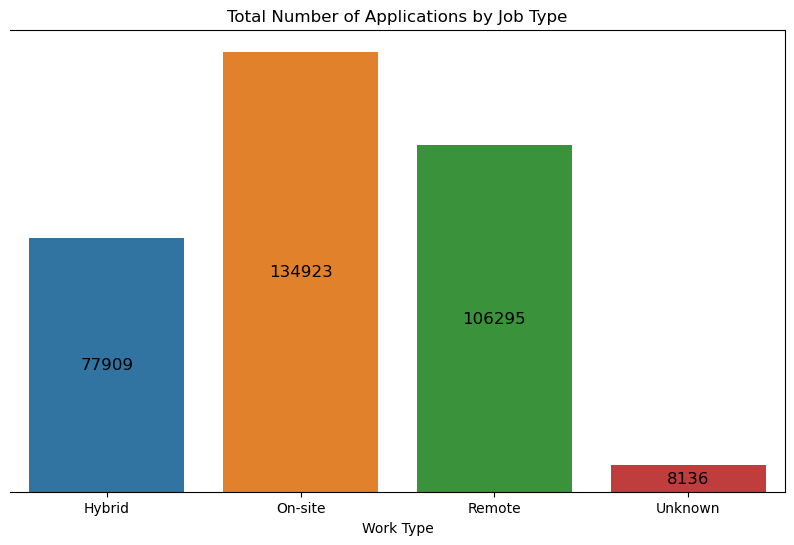

In [55]:
# Create DataFrame
df = pd.DataFrame(data)

# Fill missing values in 'no_of_application' with 0
df['no_of_application'] = df['no_of_application'].fillna(0)

# Calculate the total number of applications for each work type
total_applications = df.groupby('work_type')['no_of_application'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='work_type', y='no_of_application', data=total_applications, estimator=sum)

# Add data labels centered within each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                ha='center', va='center', fontsize=12, color='black')

plt.title('Total Number of Applications by Job Type')
plt.xlabel('Work Type')
plt.ylabel('')

# Remove y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

High Preference for On-site Work:

On-sitejobs have received the highest number of applications compared to other work types. This indicates a strong preference among job seekers for On-site opportunities.  

Diversity of Work Type Offerings:  


The presence of applications across remote, on-site, and hybrid work types indicates that while onsite work is highly favored, there is still a diverse interest in various job arrangements. Employers should consider maintaining a mix of work type options to cater to different preferences.


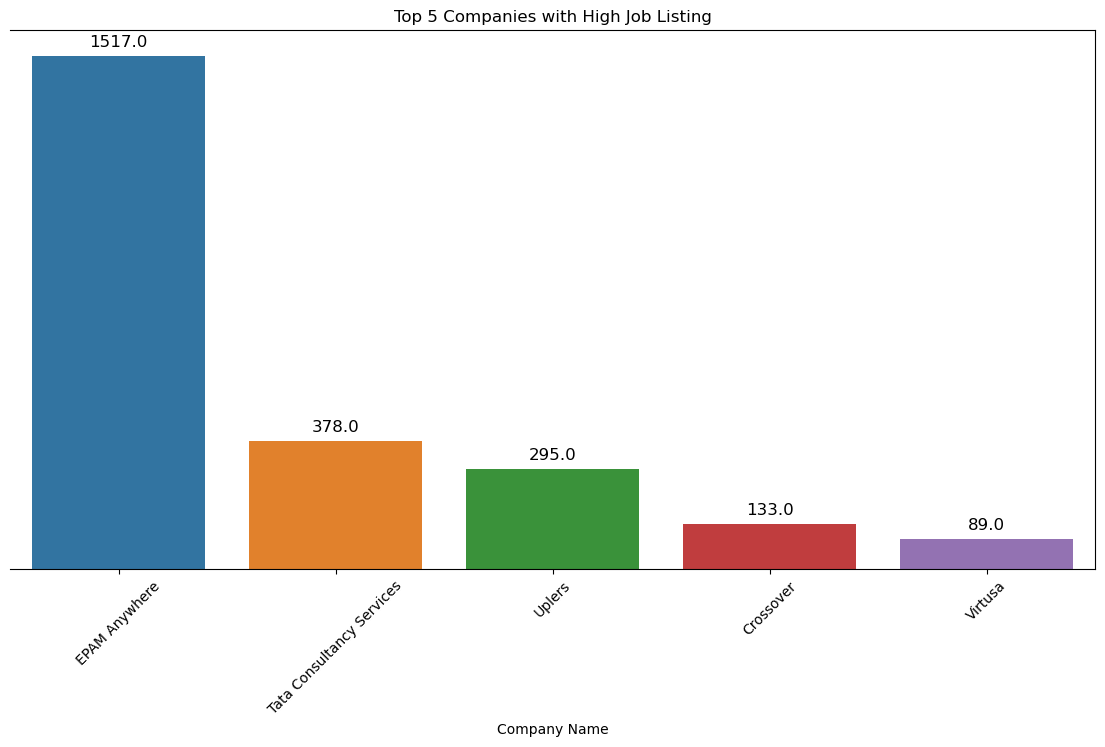

In [59]:
# Create DataFrame
df = pd.DataFrame(data)

# Count the number of job listings per company
job_counts = df['company_name'].value_counts().nlargest(5)

# Filter DataFrame to include only the top 5 companies
top_companies = job_counts.index
df_top_companies = df[df['company_name'].isin(top_companies)]

# Plot
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df_top_companies, x='company_name', order=top_companies)
plt.title('Top 5 Companies with High Job Listing')
plt.xlabel('Company Name')
plt.ylabel('')
plt.xticks(rotation=45)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                textcoords='offset points')

# Remove y-axis
plt.gca().axes.yaxis.set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show() 

Crossover is the leading company in terms of job listings, significantly ahead of the other companies. This indicates that Crossover has a high demand for employees and is actively hiring for multiple positions.  

Diversity in Industries:  

The companies listed operate in various industries, from IT services (Crossover) to telecommunications (Airtel), indicating a broad demand for job roles across different sectors.  

Strategic Hiring Locations:

The job listings are distributed across different locations in India, including Delhi, Bengaluru, and Gurugram, suggesting these areas are strategic hubs for hiring within these companies.  

Potential for Job Seekers:

For job seekers, this visual indicates that Crossover and Airtel might offer more opportunities due to the higher number of job listings. Candidates might prioritize applying to these companies if they are looking for more job openings.

In [62]:
# Saving Excel file
data.to_excel('linkendin_cleaned.xlsx', index=False)

In [63]:
data.head(5)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,job_details
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12,Unknown,5395547,About the job Crossover is the world's #1 sour...
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12,Unknown,5395547,About the job Crossover is the world's #1 sour...
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3,Shahid Ahmad,0,About the job Profile: ML EngineersExperience:...
3,3472816027,Data Analyst,"Gurugram, Haryana, India",PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,0,Vartika Singh,2094,About the job Designation: Data AnalystLocatio...
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1,Manisha (Gisele Smith),0,About the job The ideal candidate will use the...


### Encoding categorical variables

In [87]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['full_time_remote', 'work_type' , 'job', 'location', 'company_name','Hiring_person','job_details']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

## Data Modelling

### Separating the data into predictor variables and target variable

In [88]:
# 1. Separating the data into predictor variables (X) and target variable (y)
X = data.drop(['job_ID', 'no_of_employ', 'no_of_application', 'posted_day_ago', 'alumni', 'linkedin_followers'], axis =1)

y = data['work_type']

### Checking predictor variables

In [89]:
X

,job,location,company_name,work_type,full_time_remote,Hiring_person,job_details
0,679,29,523,2,9,2548,812
1,679,96,523,2,9,2548,813
2,669,41,2243,2,14,2105,2671
3,657,53,1553,1,8,2589,985
4,657,90,2147,1,8,1213,3493
...,...,...,...,...,...,...,...
7922,328,75,1527,0,9,1593,3488
7923,2611,53,2243,1,14,2508,1148
7924,2914,57,2050,1,14,11,2995
7925,2974,14,2243,2,14,345,2688


### Checking target variable

In [90]:
y

0       2
1       2
2       2
3       1
4       1
       ..
7922    0
7923    1
7924    1
7925    2
7926    0
Name: work_type, Length: 7927, dtype: int64

### Splitting data into train dataset and test dataset

In [91]:
#  Splitting data into train dataset and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.20,random_state = 42)

### Building a Logistic Regression Model

In [98]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model = LogisticRegression()

### Training the model

In [100]:
model.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.975
